In [ ]:
!unzip train\ \(2\).zip

In [2]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import keras
import xgboost as xgb
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Dense
from keras.models import Sequential
from sklearn.metrics import classification_report,accuracy_score
from keras.applications.vgg16 import VGG16

In [3]:
path_dir = "/content/train"
images = []
Categories = ["bad-soya","bad-sunflower","good-soya","good-sunflower"]
for category in Categories:
  path = os.path.join(path_dir,category)
  class_num = Categories.index(category)
  for img in os.listdir(path):
    img_arr = cv.imread(os.path.join(path,img))
    re = cv.resize(img_arr,(224,224))
    images.append([re,class_num])

In [4]:
np.random.shuffle(images)

In [5]:
x_data = []
y_data = []
for features,labels in images:
  x_data.append(features)
  y_data.append(labels)

In [6]:
x_data = np.array(x_data)
y_data = np.array(y_data)
x_data = x_data/255

In [7]:
xgb_clf = xgb.XGBClassifier()

In [8]:
vgg = VGG16(include_top=False,input_shape=(224,224,3),classes=4)
for layers in vgg.layers:
  layers.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)

In [10]:
features = vgg.predict(x_train)

36/36 [==============================] - 16s 179ms/step


In [11]:
features_reshaped = features.reshape(features.shape[0],-1)

In [12]:
features_reshaped.shape

(1145, 25088)

In [13]:
xgb_clf.fit(features_reshaped,y_train)

XGBClassifier(objective='multi:softprob')

In [14]:
test_features = vgg.predict(x_test)

9/9 [==============================] - 4s 453ms/step


In [15]:
test_features_reshaped = test_features.reshape(test_features.shape[0],-1)

In [16]:
y_pred = xgb_clf.predict(test_features_reshaped)

In [17]:
accuracy_score(y_pred,y_test)

0.9895470383275261

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        94
           1       1.00      1.00      1.00        19
           2       1.00      0.99      1.00       144
           3       0.94      1.00      0.97        30

    accuracy                           0.99       287
   macro avg       0.98      0.99      0.99       287
weighted avg       0.99      0.99      0.99       287



In [30]:
seeds = {0:"bad-soya",1:"bad-sunflower",2:"good-soya",3:"good-sunflower"}

In [36]:
def predictions(image_path,name,seeds):
  img = cv.imread(image_path)
  re = cv.resize(img,(224,224))
  re = re.reshape(1,224,224,3)
  image_features = vgg.predict(re)
  img_reshaped = image_features.reshape(image_features.shape[0],-1)
  y = xgb_clf.predict(img_reshaped)
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title(name)
  plt.subplot(1,2,2)
  plt.imshow(img)
  txt = seeds[int(y)]
  plt.title(f"prediction : {txt}")
  plt.show()

1/1 [==============================] - 0s 36ms/step


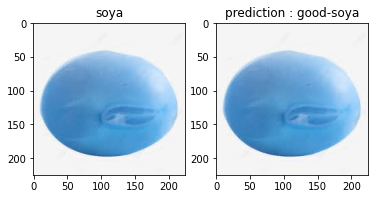

In [37]:
predictions("/content/soya.jpeg","soya",seeds)

1/1 [==============================] - 0s 35ms/step


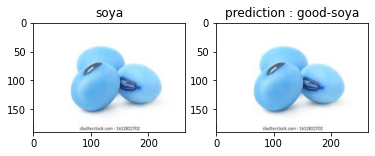

In [38]:
predictions("/content/soyaseeds.jpeg","soya",seeds)

1/1 [==============================] - 0s 36ms/step


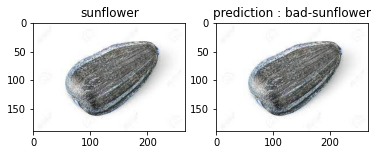

In [39]:
predictions("/content/sun flower.jpeg","sunflower",seeds)

1/1 [==============================] - 0s 46ms/step


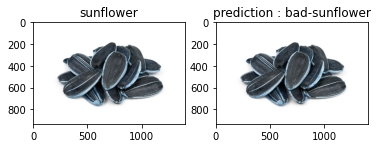

In [40]:
predictions("/content/sun seeds.webp","sunflower",seeds)